# Задача 1

Mean GC: 49.48%


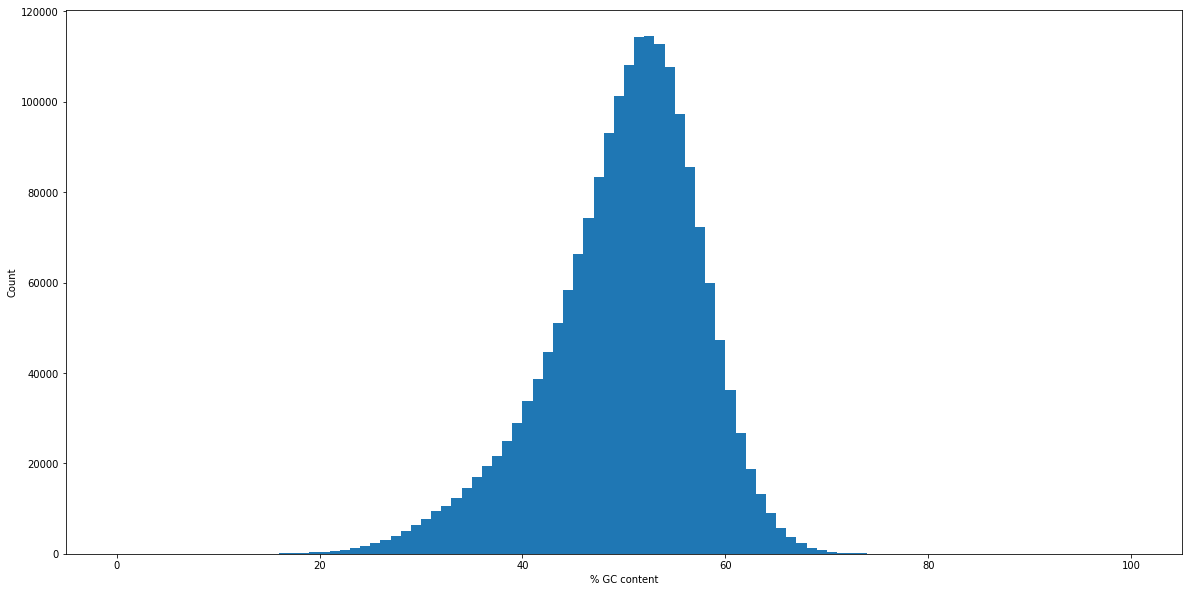

In [28]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import islice
from Bio import SeqIO

def seq_to_GC(s):
    """ Returns sequences GC-content """
    gc_content = 0
    for c in s:
        if c in 'GC':
            gc_content += 1
    return gc_content * 100 // len(s)

hist_data = list()
err_data = list()

#for rec in islice(SeqIO.parse("../../data/100x.1.fastq", "fastq"), 1000):
for rec in SeqIO.parse("../../data/100x.1.fastq", "fastq"):
#for rec in SeqIO.parse("data/test.fastq", "fastq"):
    # Zipping sequences with respective nucleotide phred quality
    seq_qtys = zip(rec.seq, rec.letter_annotations["phred_quality"])
    
    # Converting phred to probability of error
    #err_data.append(np.power(10, np.true_divide(np.negative(rec.letter_annotations["phred_quality"]), 10) ))
    
    # Saving phred scores
    err_data.append(rec.letter_annotations["phred_quality"])

    # Filtering out bad nucleotides
    qty_filtered = list(zip(*((seq, qty) for seq, qty in seq_qtys if qty > 33)))
    if not qty_filtered:
        continue

    # Removing the sequence if there are too many bad nucleotides  
    if (len(qty_filtered[0])/len(rec.seq) > 0.6):
        hist_data.append(seq_to_GC(rec.seq))


#print(err_data)
print("Mean GC: {0:.2f}%".format(np.mean(hist_data)))
plt.figure(figsize=(20,10))
plt.hist(hist_data, bins=100, range=[0, 100])
plt.xlabel("% GC content")
plt.ylabel("Count")
plt.show()

# Задача 2

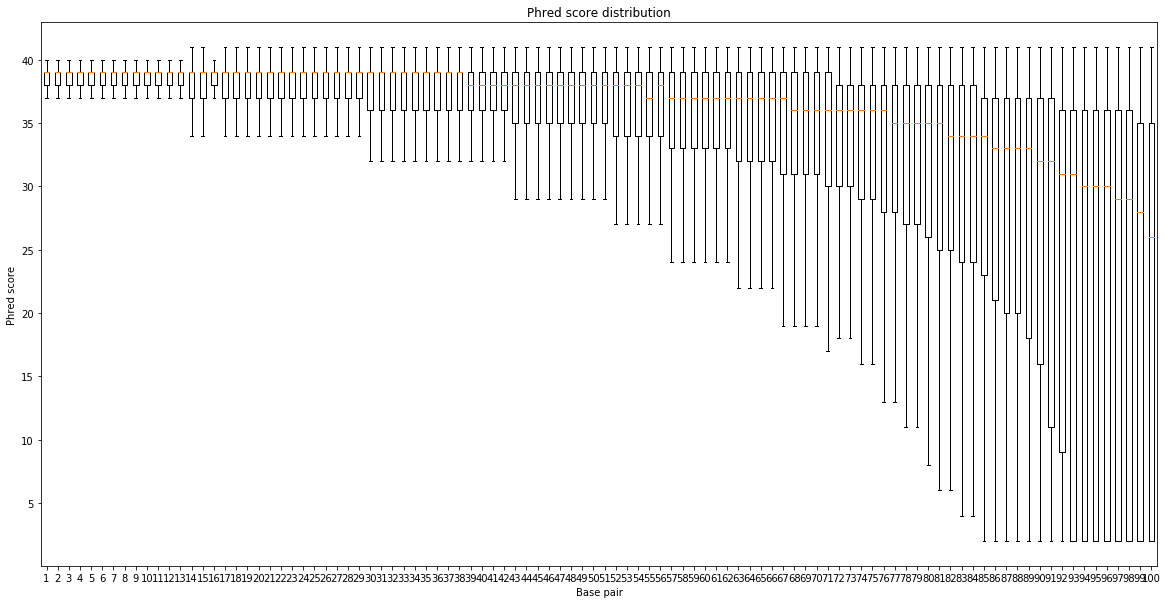

In [29]:
err = np.array(err_data)
plt.figure(figsize=(20,10))
plt.boxplot(err, showfliers=False)
plt.title("Phred score distribution")
plt.ylabel("Phred score")
plt.xlabel("Base pair")
plt.show()

# Задача 3

[Отчёт fastqc](https://htmlpreview.github.io/?https://raw.githubusercontent.com/isheshukov/bioinf-ngs-course/master/hw1/fastqc/100x.1_fastqc.html)

Полученные графики похожи на графики из отчёта.